In [60]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
fruits = pd.read_table('fruits')

In [61]:
fruits.head()


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [62]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(),fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

<IPython.core.display.Javascript object>


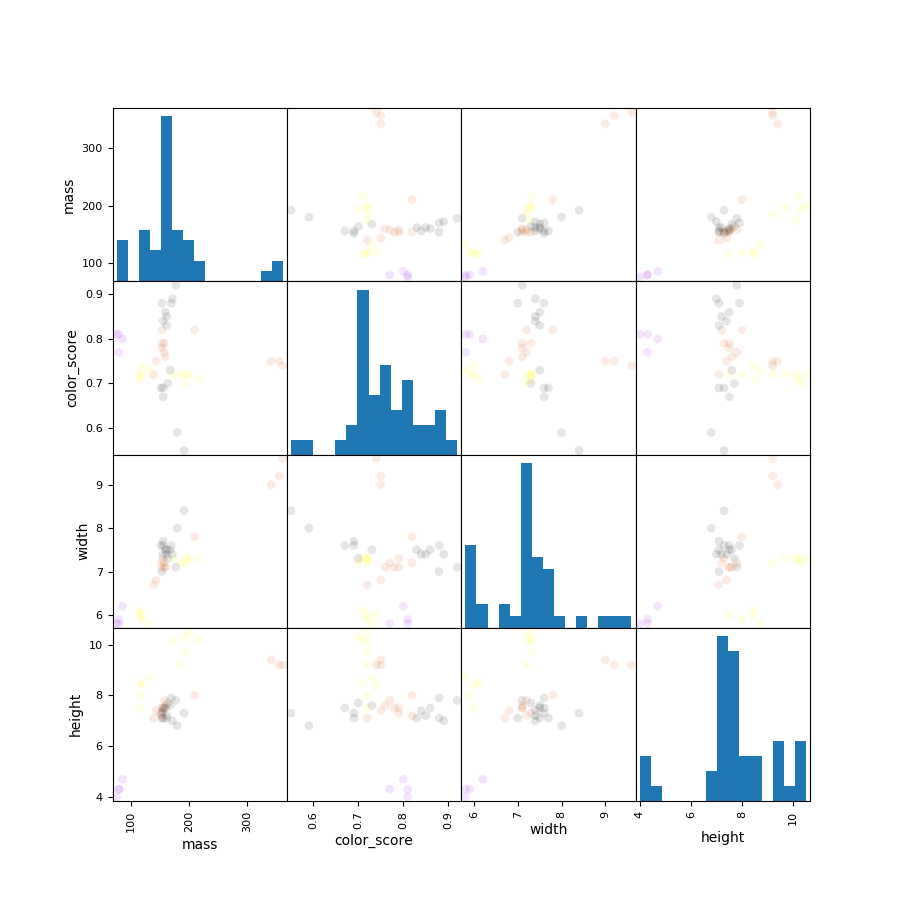

In [70]:
from matplotlib import cm
X = fruits[['fruit_name','fruit_subtype','mass','color_score','width','height']]
y = fruits['fruit_label']
X_train,X_test, y_train,y_test = train_test_split(X, y, random_state=0)
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train,c = y_train, alpha=0.1, figsize=(9, 9), diagonal='hist',cmap = cmap,hist_kwds={'bins':15},s=40,marker = 'o')


In [64]:
print(y_train)

40    3
37    3
7     2
14    1
31    3
28    3
46    4
51    4
18    1
54    4
26    3
15    1
5     2
30    3
16    1
48    4
20    1
49    4
8     1
13    1
25    3
17    1
42    3
45    4
38    3
1     1
12    1
43    4
24    3
6     2
23    1
36    3
21    1
19    1
9     1
39    3
52    4
3     2
0     1
53    4
47    4
44    4
Name: fruit_label, dtype: int64


<IPython.core.display.Javascript object>


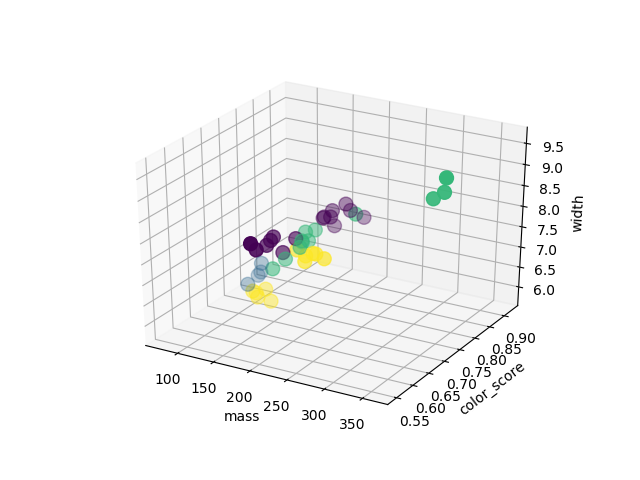

In [71]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter( X_train['mass'],X_train['color_score'],X_train['width'],c = y_train, marker = 'o',s=100)
ax.set_xlabel('mass')
ax.set_ylabel('color_score')
ax.set_zlabel('width')
plt.show()

In [72]:
# For this example, we use the mass, width, and height features of each fruit instance
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)


In [74]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [75]:
knn.score(X_test, y_test)

0.6

In [76]:
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [77]:
fruit_pred = knn.predict([[100,6.3,8.5]])
lookup_fruit_name[fruit_pred[0]]

'lemon'

In [78]:
fruits.shape

(57, 7)

<IPython.core.display.Javascript object>

KeyError: 'color_score'